In [7]:
import pandas as pd

# Load the files
stance_classification_path = 'stance_classification_with_dates.csv'
sentiment_path = 'sentiment_with_dates.csv'

# Read the CSV files into DataFrames
stance_df = pd.read_csv(stance_classification_path)
sentiment_df = pd.read_csv(sentiment_path)

# Display the first few rows of each DataFrame to understand their structure
stance_df_head = stance_df.head()
sentiment_df_head = sentiment_df.head()

stance_df_head, sentiment_df_head

(                                            sequence          seendate  \
 0      Sue Hulett : Obama stands up to wrong country  20170101T174500Z   
 1            Kerry Israeli speech — back to the past  20170101T044500Z   
 2   A Response To The Fallback Argument Of Likudniks  20170101T034500Z   
 3        Obama could recognize new Palestinian state  20170101T040000Z   
 4  Articles : How Do You Stop Good People from Hu...  20170101T083000Z   
 
                           labels                                     scores  
 0  ['anti-Israel', 'pro-Israel']   [0.6120666861534119, 0.3879333436489105]  
 1  ['pro-Israel', 'anti-Israel']  [0.9916494488716125, 0.00835058931261301]  
 2  ['pro-Israel', 'anti-Israel']   [0.9484906792640686, 0.0515093095600605]  
 3  ['anti-Israel', 'pro-Israel']   [0.7494927644729614, 0.2505072057247162]  
 4  ['pro-Israel', 'anti-Israel']   [0.6698237061500549, 0.3301762640476227]  ,
            seendate                                              Title  

In [8]:
import ast
import json

# Function to convert string representations of lists and dictionaries to actual lists and dictionaries
def parse_string_to_literal(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        return json.loads(string)

# Apply this function to 'labels' and 'scores' in stance classification data
stance_df['labels'] = stance_df['labels'].apply(parse_string_to_literal)
stance_df['scores'] = stance_df['scores'].apply(parse_string_to_literal)

# Split 'scores' into separate columns for each label
for index, row in stance_df.iterrows():
    for label, score in zip(row['labels'], row['scores']):
        stance_df.at[index, label] = score

# Apply this function to 'Sentiment Scores' in sentiment analysis data
sentiment_df['Sentiment Scores'] = sentiment_df['Sentiment Scores'].apply(parse_string_to_literal)

# Split 'Sentiment Scores' into separate columns
sentiment_scores_expanded = sentiment_df['Sentiment Scores'].apply(pd.Series)
sentiment_df = pd.concat([sentiment_df, sentiment_scores_expanded], axis=1).drop('Sentiment Scores', axis=1)

# Display the modified head of the dataframes to check the transformations
modified_stance_head = stance_df.head()
modified_sentiment_head = sentiment_df.head()

modified_stance_head, modified_sentiment_head

(                                            sequence          seendate  \
 0      Sue Hulett : Obama stands up to wrong country  20170101T174500Z   
 1            Kerry Israeli speech — back to the past  20170101T044500Z   
 2   A Response To The Fallback Argument Of Likudniks  20170101T034500Z   
 3        Obama could recognize new Palestinian state  20170101T040000Z   
 4  Articles : How Do You Stop Good People from Hu...  20170101T083000Z   
 
                       labels                                     scores  \
 0  [anti-Israel, pro-Israel]   [0.6120666861534119, 0.3879333436489105]   
 1  [pro-Israel, anti-Israel]  [0.9916494488716125, 0.00835058931261301]   
 2  [pro-Israel, anti-Israel]   [0.9484906792640686, 0.0515093095600605]   
 3  [anti-Israel, pro-Israel]   [0.7494927644729614, 0.2505072057247162]   
 4  [pro-Israel, anti-Israel]   [0.6698237061500549, 0.3301762640476227]   
 
    anti-Israel  pro-Israel  
 0     0.612067    0.387933  
 1     0.008351    0.991649  


1- Comparing Stance and Sentiment: Analyze how the stance classification relates to sentiment scores.

2- Distribution of Stance and Sentiment Scores: Visualize the distribution of stance scores and sentiment scores.

3- Correlation Analysis: See if there's any correlation between the stance scores (like pro or anti-Israel) and sentiment scores (positive, negative, neutral).

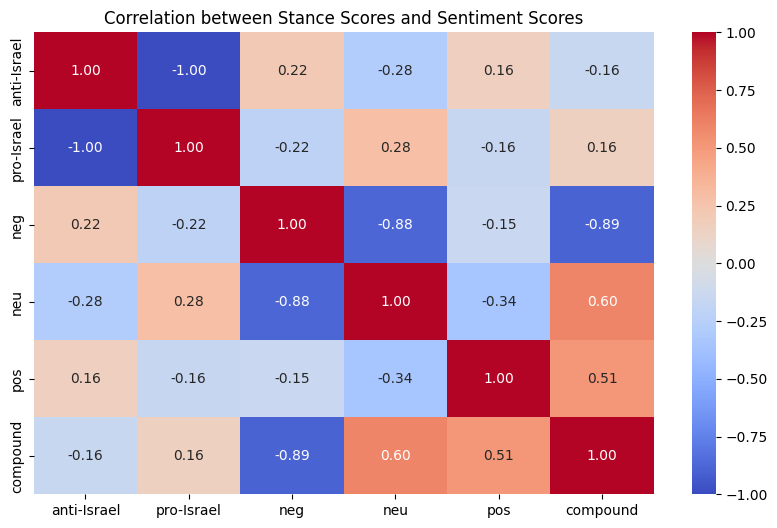

In [3]:
# Merge the datasets on the basis of titles/sequences
# Ensuring that the titles match in both datasets for accurate merging
merged_df = pd.merge(stance_df, sentiment_df, left_on='sequence', right_on='Title')

# Dropping redundant columns after merge
merged_df.drop(['Title'], axis=1, inplace=True)

# Checking the first few rows of the merged dataset
merged_df_head = merged_df.head()

# Display the structure of the merged dataset
merged_df_head

import seaborn as sns
import matplotlib.pyplot as plt

# Calculating correlation matrix for stance and sentiment scores
correlation_matrix = merged_df[['anti-Israel', 'pro-Israel', 'neg', 'neu', 'pos', 'compound']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Stance Scores and Sentiment Scores")
plt.show()


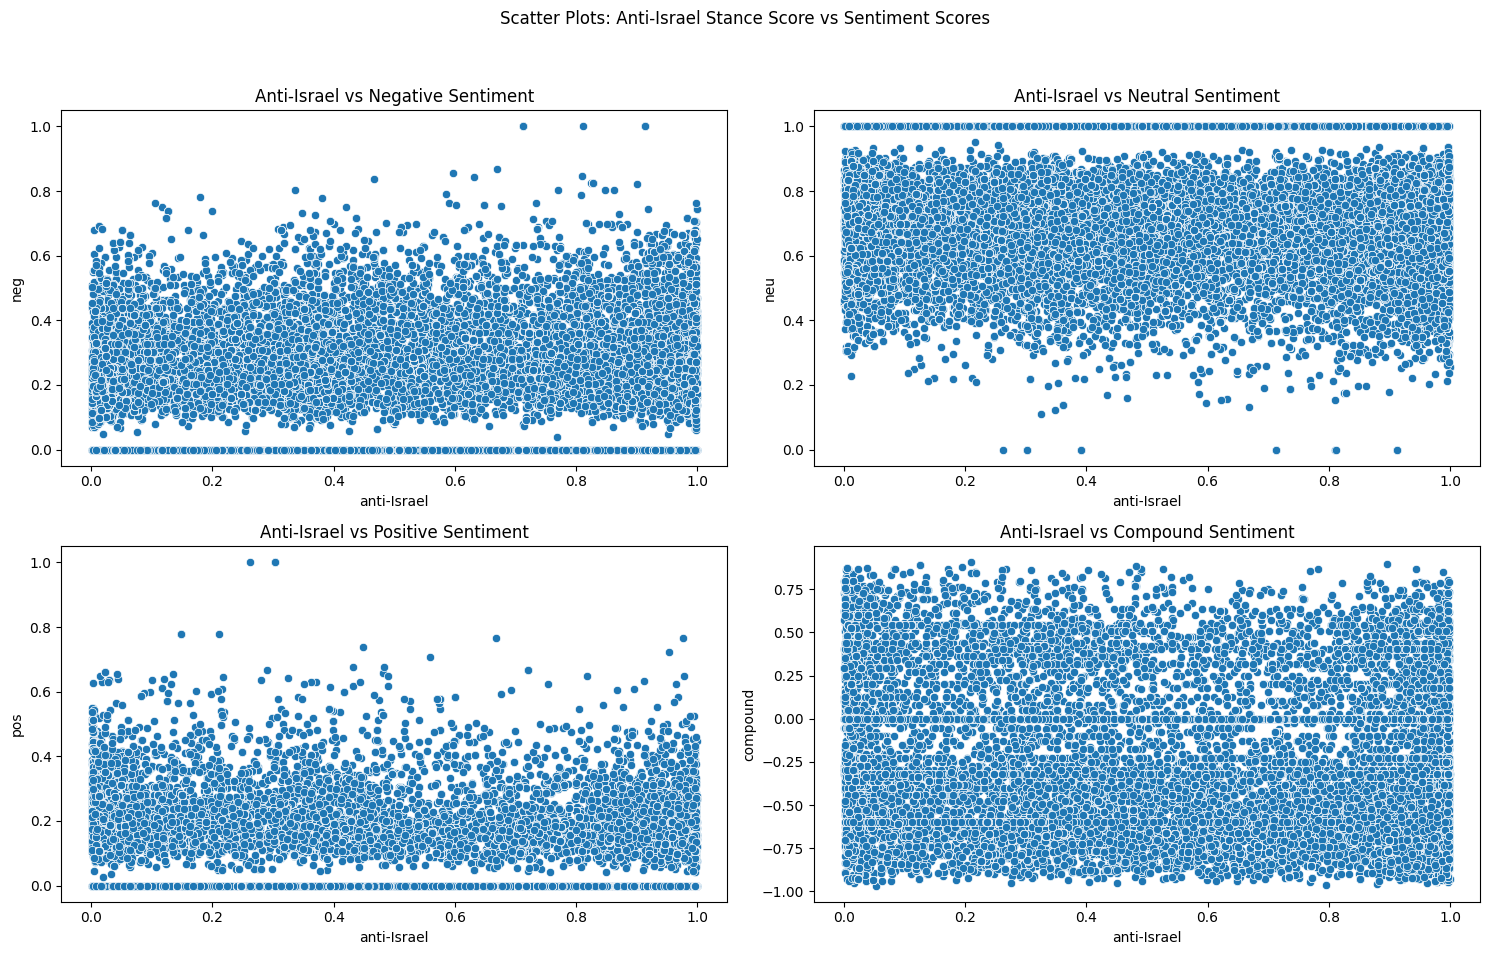

In [4]:
# Creating scatter plots for 'anti-Israel' stance score vs each sentiment score

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Scatter Plots: Anti-Israel Stance Score vs Sentiment Scores')

# Anti-Israel vs Negative Sentiment
sns.scatterplot(ax=axes[0, 0], data=merged_df, x='anti-Israel', y='neg')
axes[0, 0].set_title('Anti-Israel vs Negative Sentiment')

# Anti-Israel vs Neutral Sentiment
sns.scatterplot(ax=axes[0, 1], data=merged_df, x='anti-Israel', y='neu')
axes[0, 1].set_title('Anti-Israel vs Neutral Sentiment')

# Anti-Israel vs Positive Sentiment
sns.scatterplot(ax=axes[1, 0], data=merged_df, x='anti-Israel', y='pos')
axes[1, 0].set_title('Anti-Israel vs Positive Sentiment')

# Anti-Israel vs Compound Sentiment
sns.scatterplot(ax=axes[1, 1], data=merged_df, x='anti-Israel', y='compound')
axes[1, 1].set_title('Anti-Israel vs Compound Sentiment')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

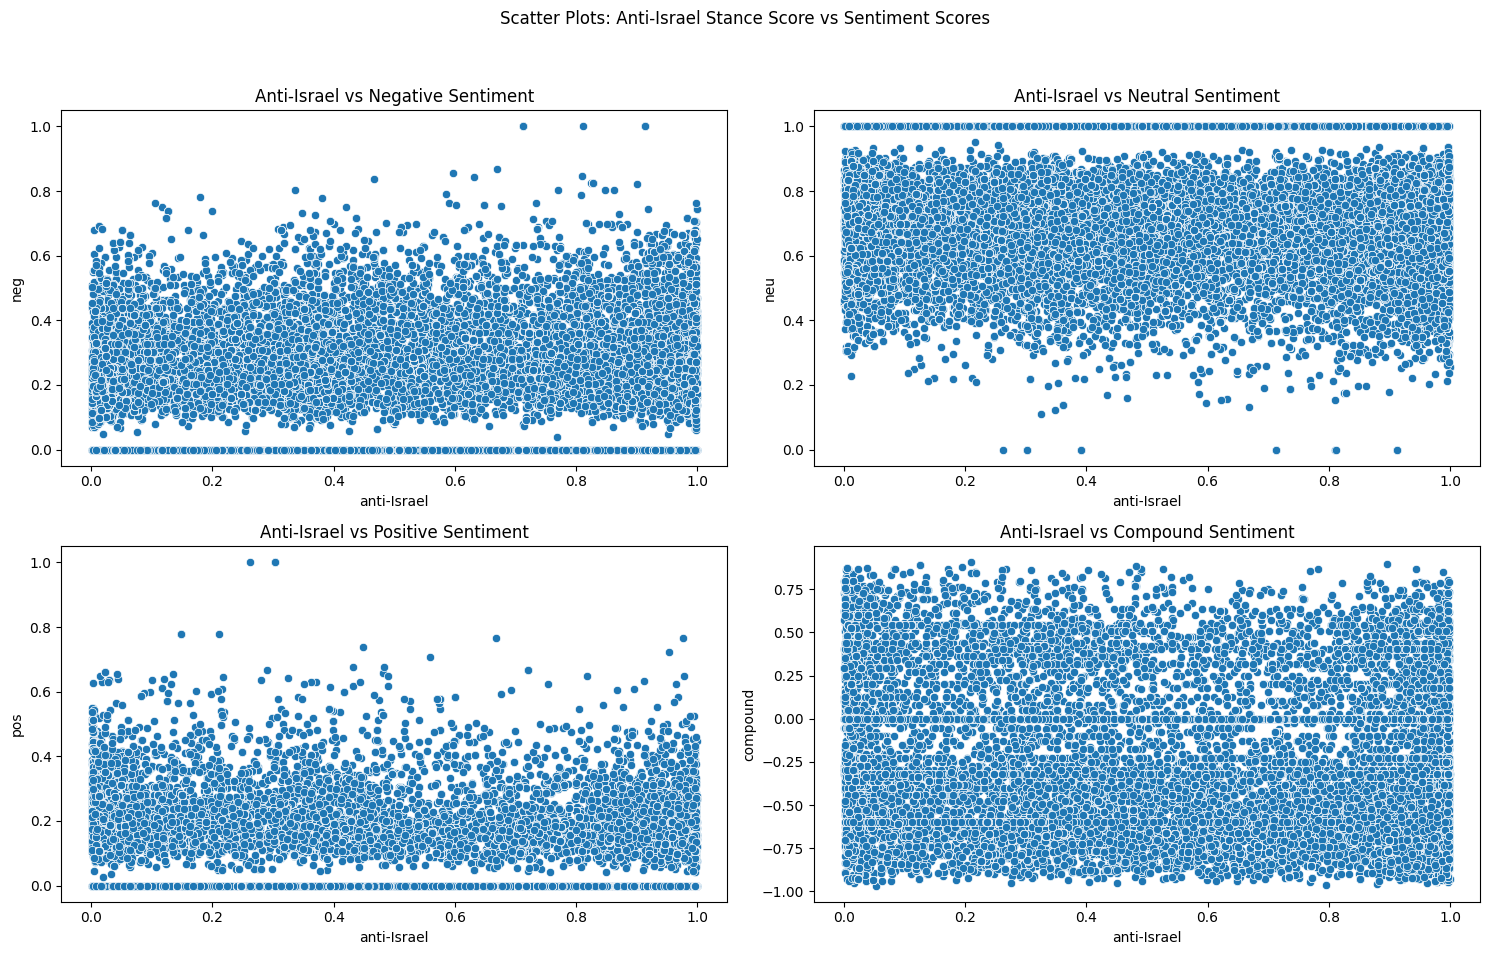

In [5]:
# Creating scatter plots for 'anti-Israel' stance score vs each sentiment score

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Scatter Plots: Anti-Israel Stance Score vs Sentiment Scores')

# Anti-Israel vs Negative Sentiment
sns.scatterplot(ax=axes[0, 0], data=merged_df, x='anti-Israel', y='neg')
axes[0, 0].set_title('Anti-Israel vs Negative Sentiment')

# Anti-Israel vs Neutral Sentiment
sns.scatterplot(ax=axes[0, 1], data=merged_df, x='anti-Israel', y='neu')
axes[0, 1].set_title('Anti-Israel vs Neutral Sentiment')

# Anti-Israel vs Positive Sentiment
sns.scatterplot(ax=axes[1, 0], data=merged_df, x='anti-Israel', y='pos')
axes[1, 0].set_title('Anti-Israel vs Positive Sentiment')

# Anti-Israel vs Compound Sentiment
sns.scatterplot(ax=axes[1, 1], data=merged_df, x='anti-Israel', y='compound')
axes[1, 1].set_title('Anti-Israel vs Compound Sentiment')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [6]:
# Regression Analysis

#Regression analysis will help us understand the predictive relationship between stance scores and sentiment scores. We'll perform linear regression for this purpose. Given the nature of your data, we'll focus on the following relationships:

#'anti-Israel' stance score as a predictor for each sentiment score.
#'pro-Israel' stance score as a predictor for each sentiment score.

# Reload the files
stance_classification_path_new = 'stance_classification.csv'
sentiment_path_new = 'sentiment.csv'

# Read the new CSV files into DataFrames
stance_df_new = pd.read_csv(stance_classification_path_new)
sentiment_df_new = pd.read_csv(sentiment_path_new)

# Preparing the data similarly to before
# Convert string representations to lists and dictionaries
stance_df_new['labels'] = stance_df_new['labels'].apply(parse_string_to_literal)
stance_df_new['scores'] = stance_df_new['scores'].apply(parse_string_to_literal)

# Split 'scores' into separate columns for each label
for index, row in stance_df_new.iterrows():
    for label, score in zip(row['labels'], row['scores']):
        stance_df_new.at[index, label] = score

# Convert 'Sentiment Scores' to dictionary and split into separate columns
sentiment_df_new['Sentiment Scores'] = sentiment_df_new['Sentiment Scores'].apply(parse_string_to_literal)
sentiment_scores_expanded_new = sentiment_df_new['Sentiment Scores'].apply(pd.Series)
sentiment_df_new = pd.concat([sentiment_df_new, sentiment_scores_expanded_new], axis=1).drop('Sentiment Scores', axis=1)

# Merging the dataframes on the sequence/title
merged_df_new = pd.merge(stance_df_new, sentiment_df_new, left_on='sequence', right_on='Title')
merged_df_new.drop(['Title'], axis=1, inplace=True)

# Display the first few rows of the merged dataframe
merged_df_new_head = merged_df_new.head()
merged_df_new_head


from sklearn.linear_model import LinearRegression

# Function to perform linear regression
def perform_linear_regression(df, x_col, y_cols):
    results = {}
    for y_col in y_cols:
        # Preparing the data
        X = df[[x_col]]
        y = df[y_col]

        # Performing linear regression
        model = LinearRegression()
        model.fit(X, y)

        # Storing the results
        results[y_col] = {
            'Coefficient': model.coef_[0],
            'Intercept': model.intercept_,
            'R-Squared': model.score(X, y)
        }
    return results

# Performing regression analysis for 'anti-Israel' score
anti_israel_regression_results = perform_linear_regression(merged_df_new, 'anti-Israel', ['neg', 'neu', 'pos', 'compound'])
anti_israel_regression_results

{'neg': {'Coefficient': 0.14533482270530187,
  'Intercept': 0.10691347480426015,
  'R-Squared': 0.04699618085273438},
 'neu': {'Coefficient': -0.20036902132357334,
  'Intercept': 0.8773651692136929,
  'R-Squared': 0.08044841607006659},
 'pos': {'Coefficient': 0.05500626917754263,
  'Intercept': 0.015734208554086037,
  'R-Squared': 0.026089106755482927},
 'compound': {'Coefficient': -0.19971132874833658,
  'Intercept': -0.12977535954911107,
  'R-Squared': 0.02403658929421515}}

/Users/busraoguzoglu/PycharmProjects/SocialProject/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/busraoguzoglu/PycharmProjects/SocialProject/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/busraoguzoglu/PycharmProjects/SocialProject/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/busraoguzoglu/PycharmProjects/SocialProject/v

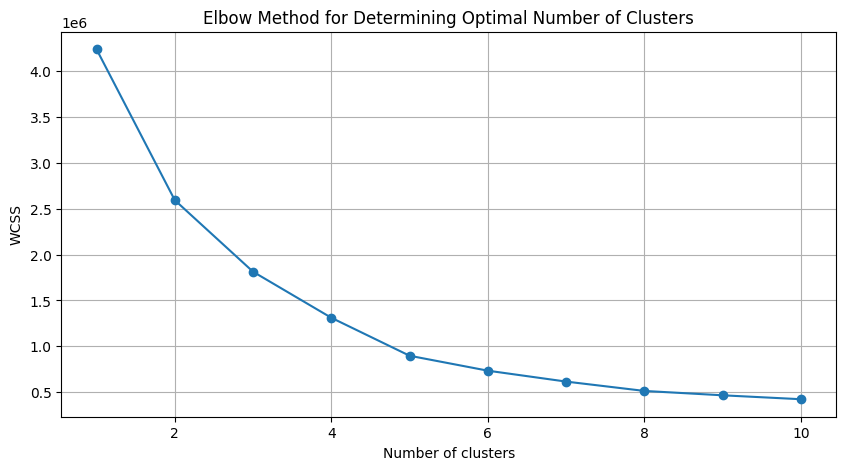

In [7]:
# Cluster Analysis

# Re-importing necessary libraries and redefining required functions after code execution state reset
import pandas as pd
import ast
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Re-defining the function to convert string representations to actual lists and dictionaries
def parse_string_to_literal(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        return json.loads(string)

# Reload the files
stance_classification_path_new = 'stance_classification.csv'
sentiment_path_new = 'sentiment.csv'

# Read the new CSV files into DataFrames
stance_df_new = pd.read_csv(stance_classification_path_new)
sentiment_df_new = pd.read_csv(sentiment_path_new)

# Preparing the data similarly to before
# Convert string representations to lists and dictionaries
stance_df_new['labels'] = stance_df_new['labels'].apply(parse_string_to_literal)
stance_df_new['scores'] = stance_df_new['scores'].apply(parse_string_to_literal)

# Split 'scores' into separate columns for each label
for index, row in stance_df_new.iterrows():
    for label, score in zip(row['labels'], row['scores']):
        stance_df_new.at[index, label] = score

# Convert 'Sentiment Scores' to dictionary and split into separate columns
sentiment_df_new['Sentiment Scores'] = sentiment_df_new['Sentiment Scores'].apply(parse_string_to_literal)
sentiment_scores_expanded_new = sentiment_df_new['Sentiment Scores'].apply(pd.Series)
sentiment_df_new = pd.concat([sentiment_df_new, sentiment_scores_expanded_new], axis=1).drop('Sentiment Scores', axis=1)

# Merging the dataframes on the sequence/title
merged_df_new = pd.merge(stance_df_new, sentiment_df_new, left_on='sequence', right_on='Title')
merged_df_new.drop(['Title'], axis=1, inplace=True)

# Preparing the data for clustering
features_for_clustering = ['anti-Israel', 'pro-Israel', 'neg', 'neu', 'pos', 'compound']
X_clustering = merged_df_new[features_for_clustering]

# Standardizing the features
scaler = StandardScaler()
X_scaled_clustering = scaler.fit_transform(X_clustering)

# Using the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled_clustering)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [8]:
# Performing K-means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled_clustering)

# Adding the cluster labels to the original dataframe
merged_df_new['Cluster'] = cluster_labels

# Displaying the first few rows of the dataframe with cluster labels
merged_df_new_head_with_clusters = merged_df_new.head()
merged_df_new_head_with_clusters

/Users/busraoguzoglu/PycharmProjects/SocialProject/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


scores                     labels  \
0   [0.6120666861534119, 0.3879333436489105]  [anti-Israel, pro-Israel]   
1  [0.9916494488716125, 0.00835058931261301]  [pro-Israel, anti-Israel]   
2   [0.9484906792640686, 0.0515093095600605]  [pro-Israel, anti-Israel]   
3   [0.7494927644729614, 0.2505072057247162]  [anti-Israel, pro-Israel]   
4   [0.6698237061500549, 0.3301762640476227]  [pro-Israel, anti-Israel]   

                                            sequence  anti-Israel  pro-Israel  \
0      Sue Hulett : Obama stands up to wrong country     0.612067    0.387933   
1            Kerry Israeli speech — back to the past     0.008351    0.991649   
2   A Response To The Fallback Argument Of Likudniks     0.051509    0.948491   
3        Obama could recognize new Palestinian state     0.749493    0.250507   
4  Articles : How Do You Stop Good People from Hu...     0.330176    0.669824   

     neg    neu    pos  compound  Cluster  
0  0.307  0.693  0.000   -0.4767        2  
1  0.000  1.000  0.000    0.0000        1  
2  0.294  0.706  0.000   -0.3612        3  
3  0.000  1.000  0.000    0.0000        0  
4  0.331  0.473  0.196   -0.2500        3

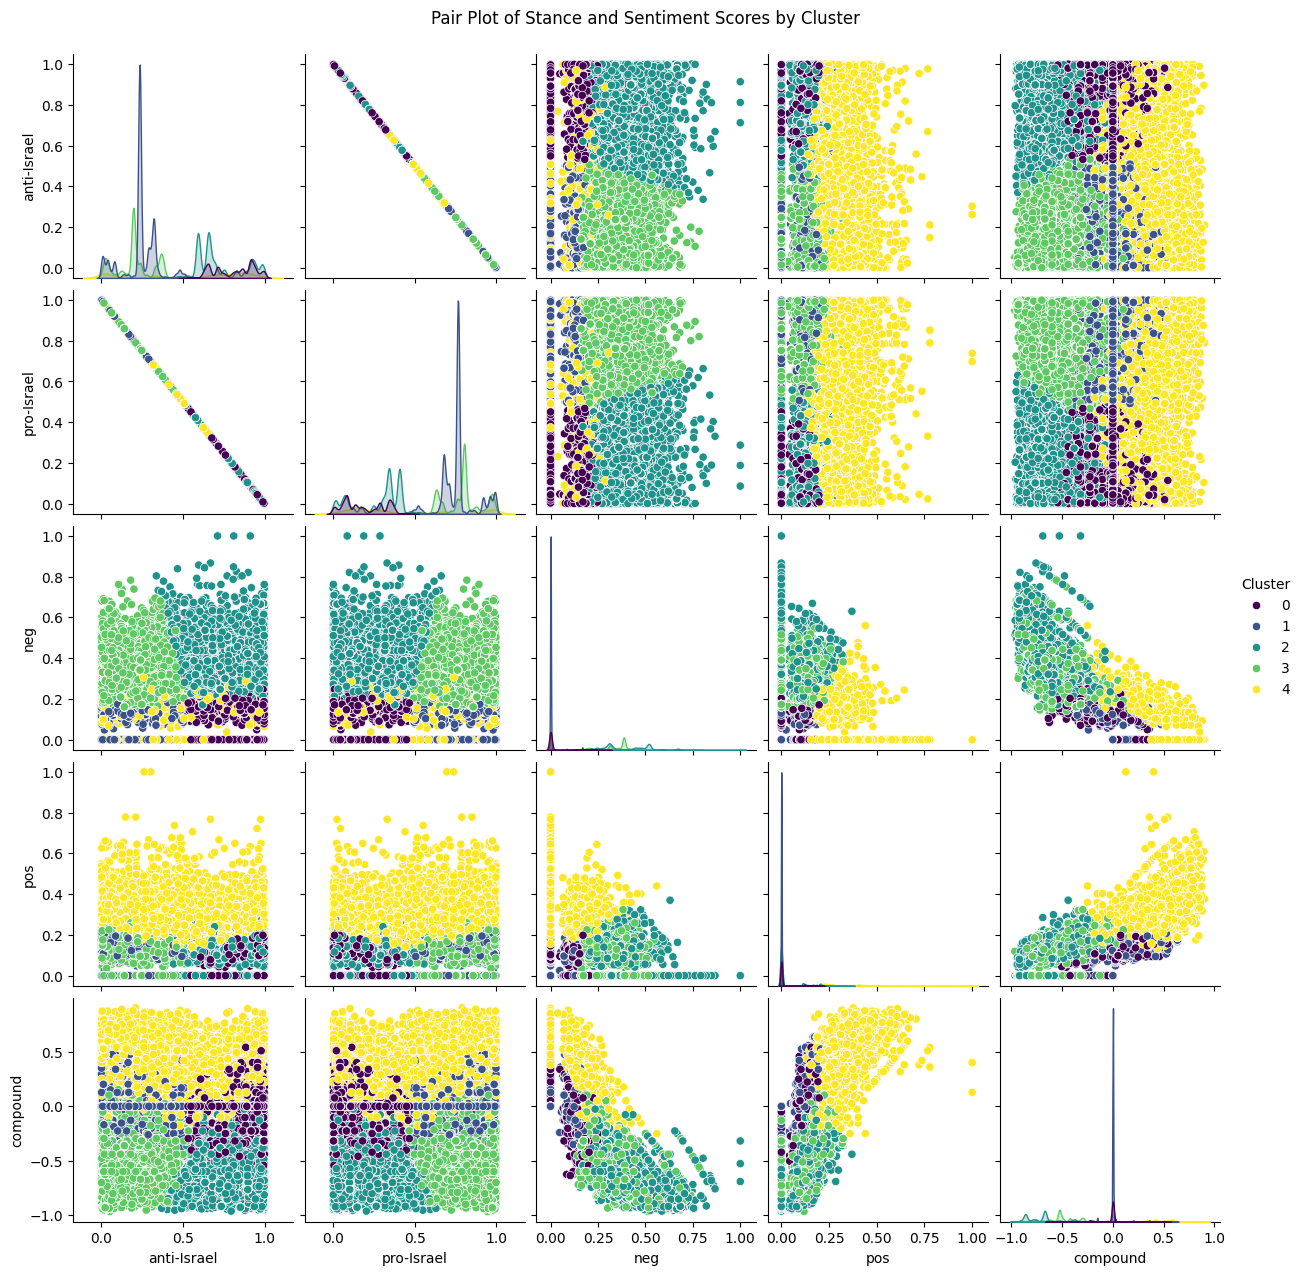

In [9]:
import seaborn as sns

# Selecting a subset of columns for visualization
columns_for_visualization = ['anti-Israel', 'pro-Israel', 'neg', 'pos', 'compound', 'Cluster']

# Creating a pair plot
sns.pairplot(merged_df_new[columns_for_visualization], hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Stance and Sentiment Scores by Cluster', y=1.02)
plt.show()

Results are sorted based on date. We can make an analysis about that.

In [11]:
# Re-importing necessary libraries after code execution state reset
import pandas as pd
import ast

# Re-defining the function to convert string representations to actual lists and dictionaries
def parse_string_to_literal(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        # In case the string is not in a correct format, which should not happen, return an empty dictionary
        return {}

# Load the files
stance_classification_path = 'stance_classification.csv'
sentiment_path = 'sentiment.csv'

# Read the CSV files into DataFrames
stance_df = pd.read_csv(stance_classification_path)
sentiment_df = pd.read_csv(sentiment_path)

# Convert string representations to lists and dictionaries
stance_df['labels'] = stance_df['labels'].apply(parse_string_to_literal)
stance_df['scores'] = stance_df['scores'].apply(parse_string_to_literal)

# Split 'scores' into separate columns for each label
for index, row in stance_df.iterrows():
    for label, score in zip(row['labels'], row['scores']):
        stance_df.at[index, label] = score

# Convert 'Sentiment Scores' to dictionary and split into separate columns
sentiment_df['Sentiment Scores'] = sentiment_df['Sentiment Scores'].apply(parse_string_to_literal)
sentiment_scores_expanded = sentiment_df['Sentiment Scores'].apply(pd.Series)
sentiment_df = pd.concat([sentiment_df, sentiment_scores_expanded], axis=1).drop('Sentiment Scores', axis=1)

# Merging the dataframes on the sequence/title
merged_df = pd.merge(stance_df, sentiment_df, left_on='sequence', right_on='Title')
merged_df.drop(['Title'], axis=1, inplace=True)

# Calculating descriptive statistics for each score
descriptive_stats_stance = merged_df[['anti-Israel', 'pro-Israel']].describe()
descriptive_stats_sentiment = merged_df[['neg', 'neu', 'pos', 'compound']].describe()

(descriptive_stats_stance, descriptive_stats_sentiment)

(         anti-Israel     pro-Israel
 count  706540.000000  706540.000000
 mean        0.439960       0.560040
 std         0.293208       0.293208
 min         0.000708       0.000657
 25%         0.234410       0.331434
 50%         0.323561       0.676439
 75%         0.668566       0.765590
 max         0.999343       0.999293,
                  neg            neu            pos       compound
 count  706540.000000  706540.000000  706540.000000  706540.000000
 mean        0.170855       0.789211       0.039935      -0.217640
 std         0.196569       0.207132       0.099852       0.377696
 min         0.000000       0.000000       0.000000      -0.966600
 25%         0.000000       0.614000       0.000000      -0.526700
 50%         0.000000       0.777000       0.000000       0.000000
 75%         0.333000       1.000000       0.000000       0.000000
 max         1.000000       1.000000       1.000000       0.905200)

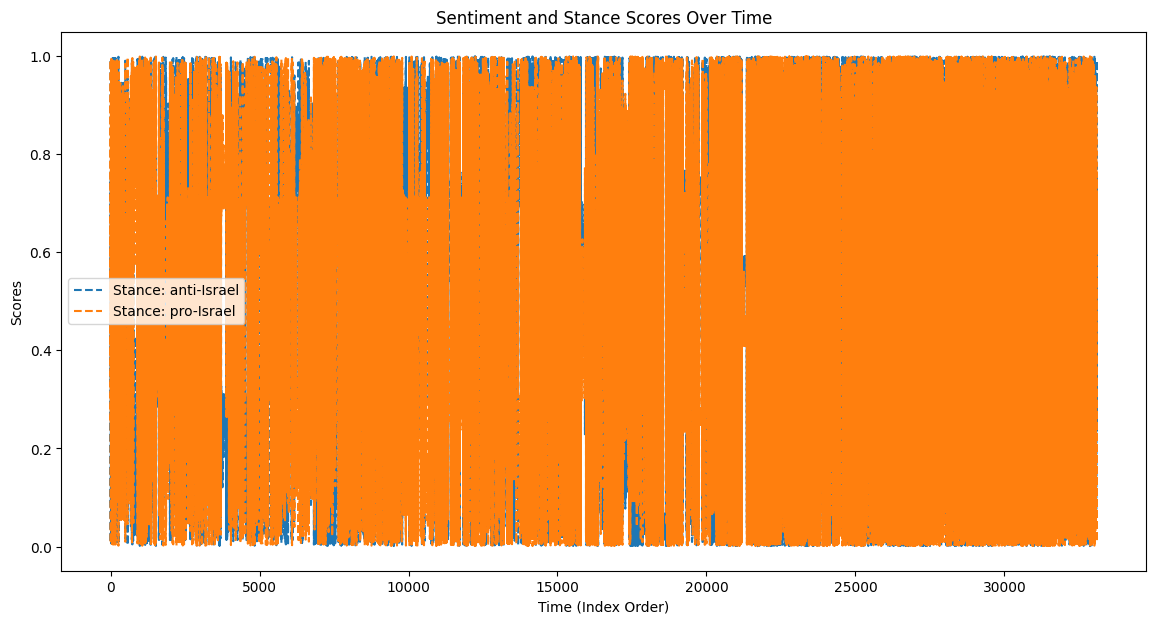

In [23]:
# Load the files
sentiment_path = 'sentiment.csv'
stance_classification_path = 'stance_classification.csv'

# Read the CSV files into DataFrames
sentiment_df = pd.read_csv(sentiment_path)
stance_df = pd.read_csv(stance_classification_path)

# Convert string representations of dictionaries to actual dictionaries for sentiment
sentiment_df['Sentiment Scores'] = sentiment_df['Sentiment Scores'].apply(parse_string_to_literal)
# Expand the sentiment scores into separate columns
sentiment_scores_expanded = sentiment_df['Sentiment Scores'].apply(pd.Series)
sentiment_df = pd.concat([sentiment_df.drop('Sentiment Scores', axis=1), sentiment_scores_expanded], axis=1)

# Convert string representations of lists to actual lists for stance and then get scores
stance_df['labels'] = stance_df['labels'].apply(parse_string_to_literal)
stance_df['scores'] = stance_df['scores'].apply(parse_string_to_literal)
# Split 'scores' into separate columns for each label
for index, row in stance_df.iterrows():
    for label, score in zip(row['labels'], row['scores']):
        stance_df.at[index, label] = score

# Since the datasets are sorted by date, we will create an index that represents time
sentiment_df['Time'] = range(len(sentiment_df))
stance_df['Time'] = range(len(stance_df))

# Plot the sentiment and stance scores over time
plt.figure(figsize=(14, 7))

# Plot sentiment scores
#for column in ['neg', 'pos']:
#    plt.plot(sentiment_df['Time'], sentiment_df[column], label=f'Sentiment: {column}')

# Plot stance scores
for column in ['anti-Israel', 'pro-Israel']:
    plt.plot(stance_df['Time'], stance_df[column], label=f'Stance: {column}', linestyle='--')

plt.title('Sentiment and Stance Scores Over Time')
plt.xlabel('Time (Index Order)')
plt.ylabel('Scores')
plt.legend()
plt.show()

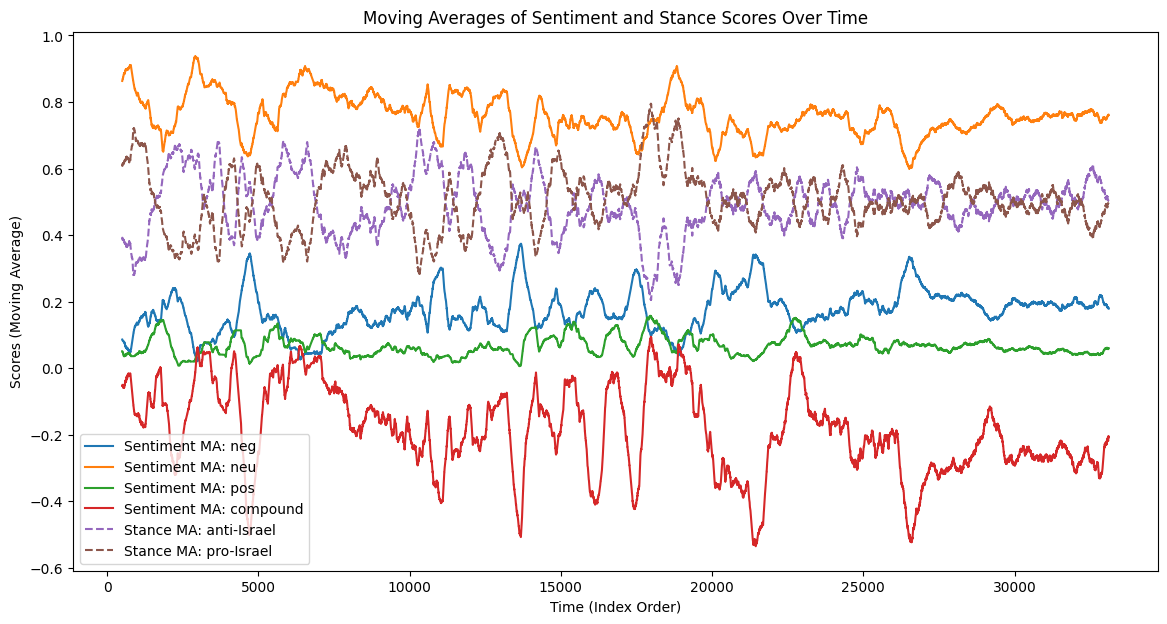

In [24]:
# Calculate moving averages for the sentiment and stance scores with a window size
window_size = 500  # Window size for the moving average

# Calculate the moving averages for sentiment scores
sentiment_moving_averages = sentiment_df[['neg', 'neu', 'pos', 'compound']].rolling(window=window_size).mean()

# Calculate the moving averages for stance scores
stance_moving_averages = stance_df[['anti-Israel', 'pro-Israel']].rolling(window=window_size).mean()

# Plot the moving averages for sentiment and stance scores over time
plt.figure(figsize=(14, 7))

# Plot moving averages for sentiment scores
for column in sentiment_moving_averages.columns:
    plt.plot(sentiment_df['Time'], sentiment_moving_averages[column], label=f'Sentiment MA: {column}')

# Plot moving averages for stance scores
for column in stance_moving_averages.columns:
    plt.plot(stance_df['Time'], stance_moving_averages[column], label=f'Stance MA: {column}', linestyle='--')

plt.title('Moving Averages of Sentiment and Stance Scores Over Time')
plt.xlabel('Time (Index Order)')
plt.ylabel('Scores (Moving Average)')
plt.legend()
plt.show()

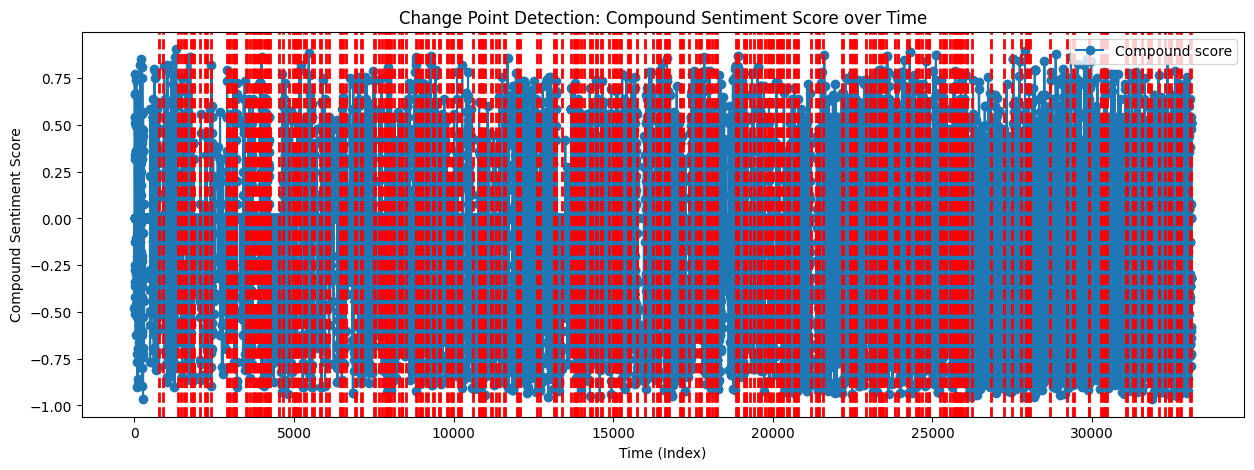

(None,
 [765,
  905,
  1355,
  1470,
  1540,
  1620,
  1780,
  1835,
  1850,
  2065,
  2210,
  2235,
  2275,
  2400,
  2900,
  2970,
  3000,
  3075,
  3125,
  3140,
  3150,
  3165,
  3480,
  3525,
  3630,
  3720,
  3750,
  3790,
  3850,
  3890,
  3925,
  3950,
  4045,
  4105,
  4150,
  4200,
  4210,
  4230,
  4540,
  4640,
  4850,
  4965,
  4995,
  5025,
  5070,
  5100,
  5135,
  5195,
  5315,
  5385,
  5575,
  5635,
  5810,
  5840,
  5995,
  6080,
  6430,
  6455,
  6540,
  6620,
  6915,
  6940,
  7100,
  7120,
  7505,
  7545,
  7650,
  7760,
  7855,
  7880,
  7930,
  7975,
  8040,
  8115,
  8290,
  8380,
  8395,
  8495,
  8825,
  8855,
  8960,
  9005,
  9120,
  9210,
  9345,
  9385,
  9550,
  9580,
  9785,
  9835,
  9925,
  9955,
  9975,
  10125,
  10200,
  10240,
  10595,
  10790,
  10860,
  10895,
  10915,
  10990,
  11155,
  11205,
  11330,
  11420,
  11590,
  11605,
  11975,
  12015,
  12090,
  12610,
  12715,
  13140,
  13215,
  13400,
  13680,
  13780,
  13820,
  13840,
  13900,

In [5]:
import pandas as pd
import numpy as np
from ruptures import Pelt
from ruptures.metrics import hausdorff
import matplotlib.pyplot as plt
import json

# Re-define the function to convert string representations to actual lists and dictionaries
def parse_string_to_literal(string):
    try:
        return json.loads(string.replace("'", "\""))
    except ValueError:
        return json.loads(string)

# Load the data
stance_classification_path = 'stance_classification.csv'
sentiment_path = 'sentiment.csv'

# Read the CSV files into DataFrames
stance_df = pd.read_csv(stance_classification_path)
sentiment_df = pd.read_csv(sentiment_path)

# Convert string representations to actual lists and dictionaries
stance_df['labels'] = stance_df['labels'].apply(parse_string_to_literal)
stance_df['scores'] = stance_df['scores'].apply(parse_string_to_literal)

# Split 'scores' into separate columns for each label
for index, row in stance_df.iterrows():
    for label, score in zip(row['labels'], row['scores']):
        stance_df.at[index, label] = score

# Convert 'Sentiment Scores' to dictionary and split into separate columns
sentiment_df['Sentiment Scores'] = sentiment_df['Sentiment Scores'].apply(parse_string_to_literal)
sentiment_scores_expanded = sentiment_df['Sentiment Scores'].apply(pd.Series)
sentiment_df = pd.concat([sentiment_df, sentiment_scores_expanded], axis=1).drop('Sentiment Scores', axis=1)

# Merge dataframes based on the index
merged_df = pd.merge(stance_df, sentiment_df, left_index=True, right_index=True)

# Selecting the 'compound' sentiment score for change point detection
compound_scores = merged_df['compound'].values

# Perform change point detection
model = "l1"  # Using L1 norm penalty
algo = Pelt(model=model, min_size=1, jump=5)
change_points = algo.fit_predict(compound_scores, pen=3)

# Plotting the results
plt.figure(figsize=(15, 5))
plt.plot(compound_scores, '-o', label='Compound score')
for cp in change_points[:-1]:  # The last point is just the end of the series
    plt.axvline(x=cp, color='r', linestyle='--', lw=2)
plt.title('Change Point Detection: Compound Sentiment Score over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Compound Sentiment Score')
plt.legend()
plt.show(), change_points


In [29]:
import pandas as pd
import json

# Load the sentiment file
sentiment_df = pd.read_csv('sentiment_with_dates_full.csv')

# Function to parse the 'Sentiment Scores' column
def parse_sentiment_scores(string):
    return json.loads(string.replace("'", "\""))

# Apply the function to the 'Sentiment Scores' column
sentiment_df['Sentiment Scores'] = sentiment_df['Sentiment Scores'].apply(parse_sentiment_scores)

# Split the 'Sentiment Scores' into separate columns
sentiment_scores_expanded = sentiment_df['Sentiment Scores'].apply(pd.Series)
sentiment_df = pd.concat([sentiment_df.drop('Sentiment Scores', axis=1), sentiment_scores_expanded], axis=1)

# Load the stance file
stance_df = pd.read_csv('stance_classification_with_dates_full.csv')

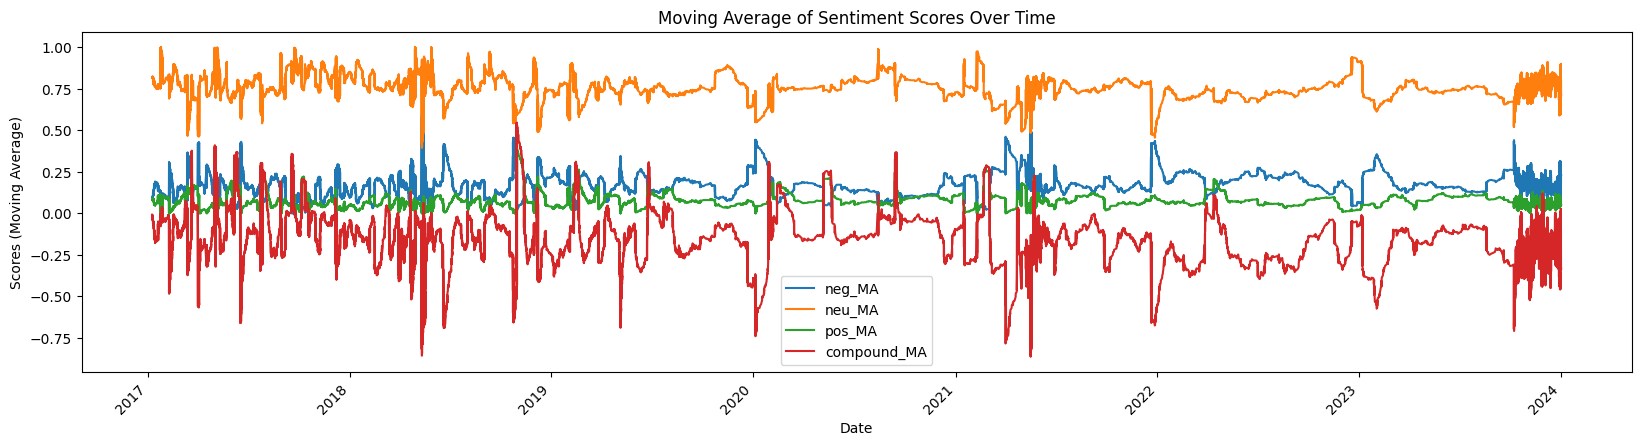

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the sentiment file
sentiment_df = pd.read_csv('sentiment_with_dates_full.csv')

# Function to parse the 'Sentiment Scores' column
def parse_sentiment_scores(string):
    return json.loads(string.replace("'", "\""))

# Apply the function to the 'Sentiment Scores' column
sentiment_df['Sentiment Scores'] = sentiment_df['Sentiment Scores'].apply(parse_sentiment_scores)

# Split the 'Sentiment Scores' into separate columns
sentiment_scores_expanded = sentiment_df['Sentiment Scores'].apply(pd.Series)
sentiment_df = pd.concat([sentiment_df.drop('Sentiment Scores', axis=1), sentiment_scores_expanded], axis=1)

# Convert 'seendate' to datetime and set as index
sentiment_df['seendate'] = pd.to_datetime(sentiment_df['seendate'], format='%Y%m%dT%H%M%SZ')
sentiment_df.set_index('seendate', inplace=True)

# Choose a window size for the rolling average
window_size = 90  # for example, a 7-day moving average

# Calculate rolling averages for sentiment scores
sentiment_df['neg_MA'] = sentiment_df['neg'].rolling(window=window_size).mean()
sentiment_df['neu_MA'] = sentiment_df['neu'].rolling(window=window_size).mean()
sentiment_df['pos_MA'] = sentiment_df['pos'].rolling(window=window_size).mean()
sentiment_df['compound_MA'] = sentiment_df['compound'].rolling(window=window_size).mean()

# For Sentiment Data Plotting
sentiment_df[['neg_MA', 'neu_MA', 'pos_MA', 'compound_MA']].plot(
    title='Moving Average of Sentiment Scores Over Time', 
    figsize=(20, 5), # Set the figure size here
    legend=True
)
plt.xlabel('Date')
plt.ylabel('Scores (Moving Average)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

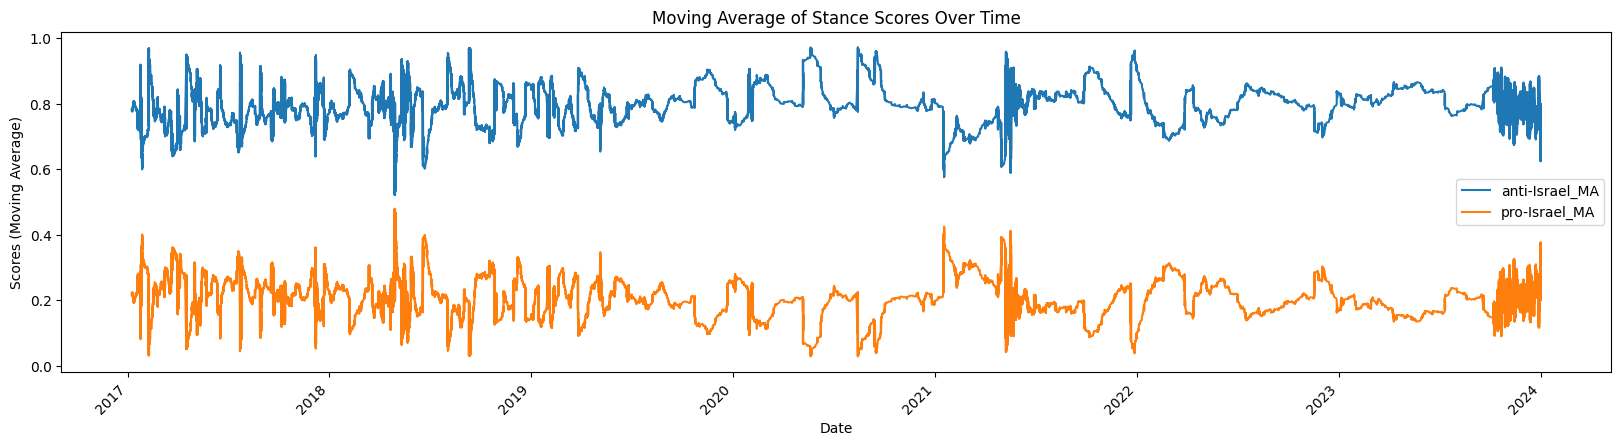

In [31]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the stance file
stance_df = pd.read_csv('stance_classification_with_dates_full.csv')

# Function to parse the 'scores' column
def parse_scores(string):
    return ast.literal_eval(string)

# Apply the function to the 'scores' column
stance_df['scores'] = stance_df['scores'].apply(parse_scores)

# Split the 'scores' into separate columns
stance_df[['anti-Israel', 'pro-Israel']] = pd.DataFrame(stance_df['scores'].tolist(), index=stance_df.index)

# Convert 'seendate' to datetime and set as index
stance_df['seendate'] = pd.to_datetime(stance_df['seendate'], format='%Y%m%dT%H%M%SZ')
stance_df.set_index('seendate', inplace=True)

# Choose a window size for the rolling average
window_size = 90  # for example, a 7-day moving average

# Calculate rolling averages
stance_df['anti-Israel_MA'] = stance_df['anti-Israel'].rolling(window=window_size).mean()
stance_df['pro-Israel_MA'] = stance_df['pro-Israel'].rolling(window=window_size).mean()

# For Stance Data Plotting
stance_df[['anti-Israel_MA', 'pro-Israel_MA']].plot(
    title='Moving Average of Stance Scores Over Time', 
    figsize=(20, 5), # Set the figure size here
    legend=True
)
plt.xlabel('Date')
plt.ylabel('Scores (Moving Average)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


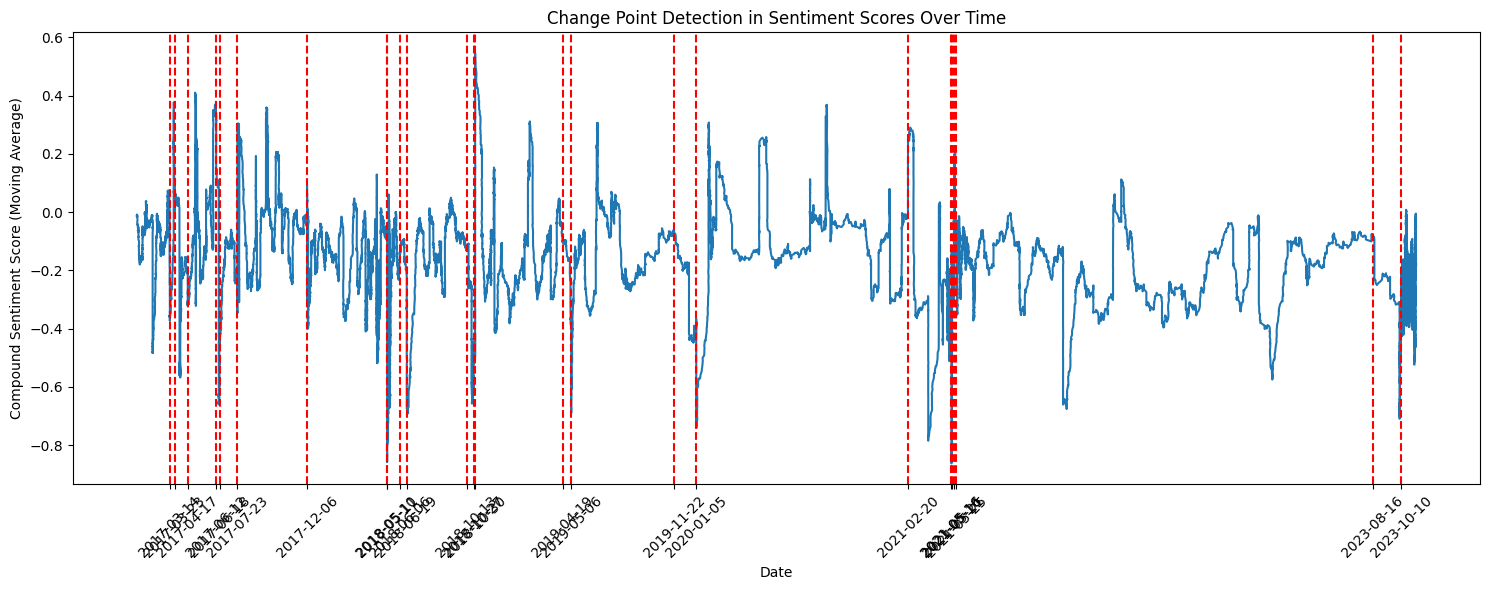

In [40]:
import pandas as pd
import json
import ruptures as rpt
import matplotlib.pyplot as plt

# Load the data
sentiment_df = pd.read_csv('sentiment_with_dates.csv')

# Parse the 'Sentiment Scores' column
def parse_sentiment_scores(string):
    return json.loads(string.replace("'", "\""))

sentiment_df['Sentiment Scores'] = sentiment_df['Sentiment Scores'].apply(parse_sentiment_scores)

# Extract the 'compound' score
sentiment_df['compound'] = sentiment_df['Sentiment Scores'].apply(lambda x: x['compound'])

# Convert 'seendate' to datetime
sentiment_df['seendate'] = pd.to_datetime(sentiment_df['seendate'], format='%Y%m%dT%H%M%SZ')
sentiment_df.set_index('seendate', inplace=True)

# Select the 'compound' scores for change point detection
data = sentiment_df['compound'].values

# Apply a moving average to the 'compound' score
window_size = 90  # Example: 7-day moving average
sentiment_df['compound_MA'] = sentiment_df['compound'].rolling(window=window_size).mean()

# Drop NaN values that arise due to the moving average calculation
data = sentiment_df['compound_MA'].dropna().values

# Change point detection using the moving average data
model = "l2"
algo = rpt.Pelt(model=model).fit(data)
result = algo.predict(pen=9)

# Plotting
#rpt.display(data, result, figsize=(10, 6))
#plt.show()

import matplotlib.dates as mdates

# Assume 'result' contains the indices of the detected change points
change_point_dates = sentiment_df.index[result[:-1]]  # Exclude the last point which is just the end of the series

# Custom plotting without the legend box
plt.figure(figsize=(15, 6))
plt.plot(sentiment_df.index, sentiment_df['compound_MA'], label='Compound Score (Moving Average)')

# Plot vertical lines for change points and add custom ticks for those dates
change_dates = sentiment_df.index[result[:-1]]  # Get the dates for the change points
for cp_date in change_dates:
    plt.axvline(x=cp_date, color='r', linestyle='--')

# Set custom ticks on the x-axis at the positions of the change points
plt.xticks(ticks=change_dates, labels=[date.strftime('%Y-%m-%d') for date in change_dates], rotation=45)

plt.title('Change Point Detection in Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Compound Sentiment Score (Moving Average)')
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()